#### Script to analyse optimum of loss function for $\lambda=1/8R_e$ to $\lambda=9/8R_e$ and $\sqrt{\bar N}=100$ (exponential SA cooling). All values are averaged over 1000 random initial configurations. Target densities alternate between 0.1 and 0.9.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py

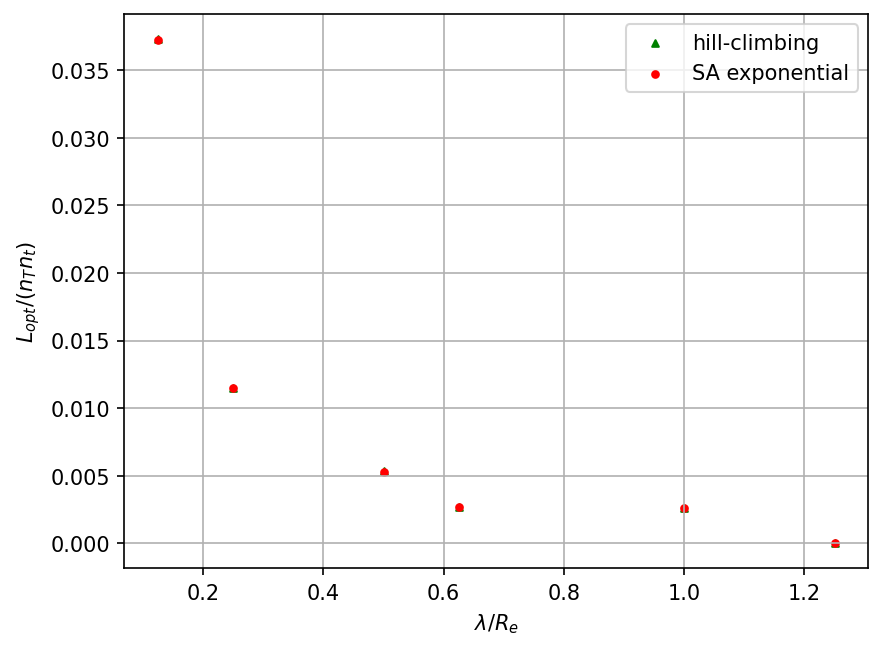

In [3]:
n_sim=6 #number of values of lambda
# natural_var=0.0423

coordfile='no_sa/coord.h5'

with h5py.File(coordfile, 'r') as f:
    umbrella_field = np.array(f["umbrella_field"])
ntarget=len(umbrella_field[umbrella_field>-1])
opt_sa_exp=np.loadtxt(f"sa/exp_cooling/opt.csv")/ntarget
opt_sa_exp=opt_sa_exp.reshape(n_sim,int(len(opt_sa_exp)/n_sim)).mean(axis=1)
# opt_sa_lin=np.loadtxt(f"sa/exp_cooling/opt.csv")/ntarget
# opt_sa_lin=opt_sa_lin.reshape(n_sim,int(len(opt_sa_lin)/n_sim)).mean(axis=1)
opt_no_sa=np.loadtxt("no_sa/opt.csv")/ntarget
opt_no_sa=opt_no_sa.reshape(n_sim,int(len(opt_no_sa)/n_sim)).mean(axis=1)
lam=np.loadtxt("no_sa/lam.csv")*1/8
plt.figure(dpi=150)
plt.grid()
plt.xlabel("$\lambda/R_e$")
plt.ylabel("$L_{opt}/(n_Tn_t)$")
# plt.hlines(natural_var,np.min(lam),np.max(lam),label=r"$\Delta\tilde\phi_{hom}$",lw=1)
plt.scatter(lam,opt_no_sa,s=10,alpha=1.0,color='g',marker='^',label='hill-climbing')
plt.scatter(lam,opt_sa_exp,s=10,alpha=1.0,color='r',marker='o',label="SA exponential")
# plt.scatter(lam,opt_sa_lin,s=10,alpha=1.0,marker='v',color='blue',label="SA linear")
plt.legend()
plt.savefig("lamella_opt.pdf")
plt.show()